In [3]:
import os
import pandas as pd
import numpy as np

HOUSING_PATH = os.path.join("kaggle_datasets", "titanic")
#HOUSING_PATH = os.path.join(HOUSING_PATH, "titanic")
#must be a string
FILE_NAME="train.csv"

def load_housing_data(housing_path=HOUSING_PATH,file_name=FILE_NAME):
    csv_path=os.path.join(housing_path,file_name)
    return pd.read_csv(csv_path)
    
titanic_train,titanic_test,titanic_example_sub=load_housing_data(HOUSING_PATH,"train.csv"),load_housing_data(HOUSING_PATH,"test.csv"),load_housing_data(HOUSING_PATH,"gender_submission.csv")


In [4]:
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_train.info()
print('-'*40)
titanic_test.info()
#titanic_train.loc[titanic_train['Parch']==40 ,'Parch'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [6]:
titanic_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Herman, Mrs. Samuel (Jane Laver)",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
titanic_train.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Herman, Mrs. Samuel (Jane Laver)",male,1601,B96 B98,S
freq,1,577,7,4,644


In [8]:
titanic_train[["Pclass","Survived"]].groupby(by='Pclass',as_index=False).mean().sort_values(by='Survived')

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [9]:
titanic_train[["Sex","Survived"]].groupby(by="Sex",as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
#titanic_train.Fare.between(-1000, 1000, inclusive=False)
titanic_train[["SibSp","Survived"]].groupby(by="SibSp",as_index=False).mean().sort_values(by='Survived',ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
titanic_train[["Parch","Survived"]].groupby(by="Parch",as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [12]:
temp=titanic_train[["SibSp","Survived"]].groupby(by="Survived",as_index=False).count()
#temp['SibSp'] = titanic_train[["SibSp","Survived"]].groupby(by="Survived",as_index=False).count()['SibSp'].apply(lambda x: x/int(titanic_train[["SibSp"]].count()))
#temp

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

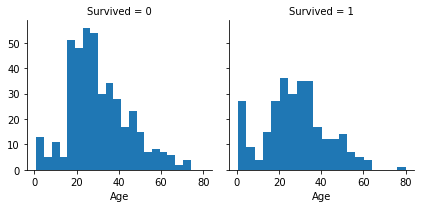

In [14]:
g= sns.FacetGrid(titanic_train,col='Survived')
g.map(plt.hist,'Age',bins=20)

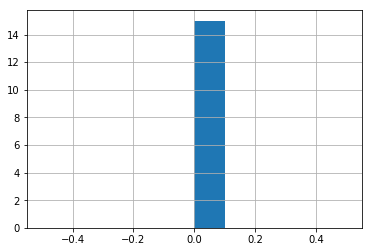

In [15]:
%matplotlib inline
titanic_train[titanic_train["Fare"]<=0].Fare.hist()

d:\carpeta1\ml_python\env\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


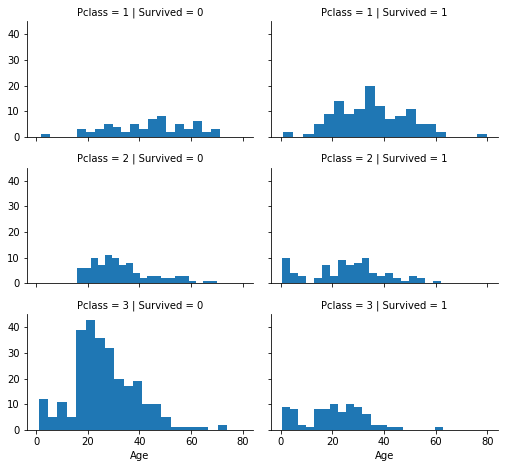

In [16]:
grid= sns.FacetGrid(titanic_train,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=1,bins=20)
grid.add_legend();

d:\carpeta1\ml_python\env\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\carpeta1\ml_python\env\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


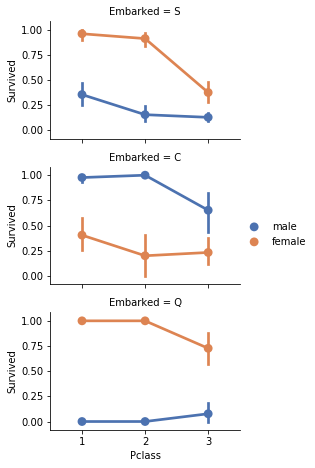

In [17]:
grid = sns.FacetGrid(titanic_train, row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

d:\carpeta1\ml_python\env\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


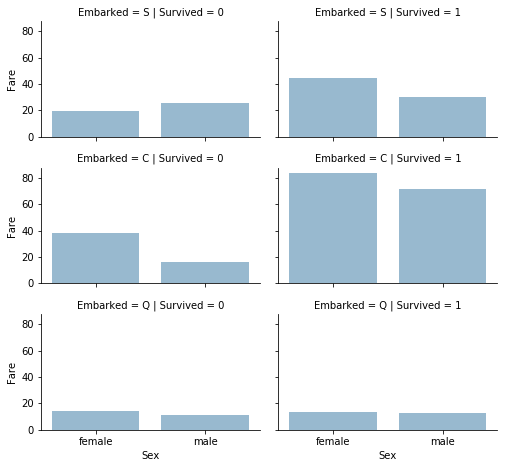

In [18]:
grid= sns.FacetGrid(titanic_train,row="Embarked",col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

In [19]:
#print("Before", titanic_train.shape, titanic_train.shape, combine[0].shape, combine[1].shape
titanic_train = titanic_train.drop(['Ticket', 'Cabin'], axis=1)
titanic_test = titanic_test.drop(['Ticket', 'Cabin'], axis=1)
combine = [titanic_train, titanic_test]

In [20]:
titanic_train.head()
#titanic_train.loc[titanic_train['Parch']==40 ,'Parch']
titanic_train.loc[(titanic_train['Parch']>=40) | (titanic_train['SibSp']>=40),['Parch','SibSp']]

,Parch,SibSp


In [21]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\. ',expand=False)
#extrae la palabra que se encuentra antes del punto dentro del string
pd.crosstab(titanic_train['Title'], titanic_train['Sex'])



Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [23]:
titanic_train.loc[(titanic_train['Parch']>=40) | (titanic_train['SibSp']>=40),['Parch','SibSp']]

,Parch,SibSp


In [24]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

combine[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [25]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [26]:
titanic_train = titanic_train.drop(['Name','PassengerId'],axis=1)
titanic_test = titanic_test.drop(['Name'],axis=1)
combine = [titanic_train,titanic_test]
titanic_train.shape, titanic_test.shape

((891, 9), (418, 9))

In [27]:
titanic_train.loc[(titanic_train['Parch']>=40) | (titanic_train['SibSp']>=40),['Parch','SibSp']]

,Parch,SibSp


In [28]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
    
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [29]:
combine[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [30]:
titanic_train.loc[(titanic_train['Parch']>=40) | (titanic_train['SibSp']>=40),['Parch','SibSp']]

,Parch,SibSp


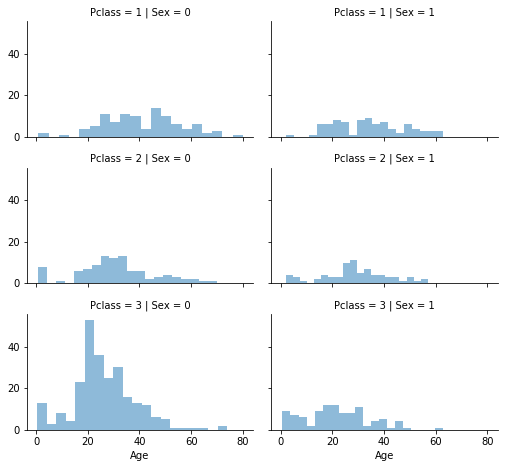

In [31]:
grid=sns.FacetGrid(titanic_train, row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist, 'Age',alpha=.5,bins=20)
grid.add_legend()

In [32]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [33]:
titanic_train.loc[(titanic_train['Parch']>=40) | (titanic_train['SibSp']>=40),['Parch','SibSp']]

,Parch,SibSp


In [34]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            data_group=dataset[(dataset['Sex']==i) & (dataset['Pclass']== j+1)]['Age'].dropna()
            
            age_guess= data_group.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass ==  j+1),'Age']=guess_ages[i,j]
                        
    dataset['Age'] = dataset['Age'].astype(int)
                        
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [35]:
combine[0].loc[(titanic_train['Parch']>=5) | (titanic_train['SibSp']>=5),['Parch','SibSp']]

,Parch,SibSp
13,5,1
25,5,1
59,2,5
71,2,5
159,2,8
180,2,8
201,2,8
324,2,8
386,2,5
480,2,5


In [36]:
combine[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [37]:
titanic_train.loc[(titanic_train['Parch']>=40) | (titanic_train['SibSp']>=40),['Parch','SibSp']]

,Parch,SibSp


In [38]:
titanic_train['AgeBand'] = pd.cut(titanic_train['Age'], 5)
titanic_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [39]:
combine[0][['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [40]:
titanic_train.loc[(titanic_train['Parch']>=40) | (titanic_train['SibSp']>=40),['Parch','SibSp']]

,Parch,SibSp


In [41]:
for dataset in combine:
    dataset.loc[ dataset['Age']<= 16,'Age']=0
    dataset.loc[ (dataset['Age']> 16) & (dataset['Age']<=32),'Age']=1
    dataset.loc[ (dataset['Age']> 32) & (dataset['Age']<=48),'Age']=2
    dataset.loc[ (dataset['Age']> 48) & (dataset['Age']<=64),'Age']=3
    dataset.loc[ (dataset['Age']> 64),'Age']=4
    
combine[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [42]:
titanic_train = titanic_train.drop(['AgeBand'], axis=1)

In [43]:
combine=[titanic_train,titanic_test]

In [44]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [45]:
titanic_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [46]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
    
titanic_train[['IsAlone','Survived']].groupby(by='IsAlone',as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [47]:
titanic_train=titanic_train.drop(['Parch','SibSp','FamilySize'],axis=1)
titanic_test=titanic_test.drop(['Parch','SibSp','FamilySize'],axis=1)
combine=[titanic_train,titanic_test]
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [48]:
for dataset in combine:
    dataset['Age*Class']=dataset.Age*dataset.Pclass
    
titanic_train.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [49]:
freq_port=titanic_train.Embarked.dropna().mode()[0]
freq_port

'S'

In [50]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
titanic_train[['Embarked','Survived']].groupby(by='Embarked',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [51]:
type(titanic_train['Embarked'])

pandas.core.series.Series

In [52]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'C':1,'Q':2,'S':3}).astype(int)
    
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,3,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,3,2,1,3
3,1,1,1,2,53.1000,3,3,0,2
4,0,3,0,2,8.0500,3,1,1,6


In [53]:
titanic_train['Fare'].fillna(titanic_train.dropna().median(),inplace=True)
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,3,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,3,2,1,3
3,1,1,1,2,53.1000,3,3,0,2
4,0,3,0,2,8.0500,3,1,1,6


In [54]:
titanic_train['FareBand']=pd.qcut(titanic_train['Fare'],4)


In [55]:
titanic_train[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [56]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare'] <= 14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare'] <= 31.0),'Fare']=2
    dataset.loc[(dataset['Fare']>31.0) & (dataset['Fare'] <= 512.329),'Fare']=3


titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,FareBand
0,0,3,0,1,0.0,3,1,0,3,"(-0.001, 7.91]"
1,1,1,1,2,3.0,1,3,0,2,"(31.0, 512.329]"
2,1,3,1,1,1.0,3,2,1,3,"(7.91, 14.454]"
3,1,1,1,2,3.0,3,3,0,2,"(31.0, 512.329]"
4,0,3,0,2,1.0,3,1,1,6,"(7.91, 14.454]"


In [57]:
titanic_drop=titanic_train.drop(['FareBand'],axis=1)
#titanic_test=titanic_test.drop(['FareBand'],axis=1)
combine=[titanic_drop,titanic_test]

In [58]:
titanic_drop.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0.0,3,1,0,3
1,1,1,1,2,3.0,1,3,0,2
2,1,3,1,1,1.0,3,2,1,3
3,1,1,1,2,3.0,3,3,0,2
4,0,3,0,2,1.0,3,1,1,6
5,0,3,0,1,1.0,2,1,1,3
6,0,1,0,3,3.0,3,1,1,3
7,0,3,0,0,2.0,3,4,0,0
8,1,3,1,1,1.0,3,3,0,3
9,1,2,1,0,2.0,1,3,0,0


In [59]:
titanic_test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0.0,2,1,1,6
1,893,3,1,2,0.0,3,3,0,6
2,894,2,0,3,1.0,2,1,1,6
3,895,3,0,1,1.0,3,1,1,3
4,896,3,1,1,1.0,3,3,0,3
5,897,3,0,0,1.0,3,1,1,0
6,898,3,1,1,0.0,2,2,1,3
7,899,2,0,1,2.0,3,1,0,2
8,900,3,1,1,0.0,1,3,1,3
9,901,3,0,1,2.0,3,1,0,3


In [60]:
titanic_test['Fare'].fillna(titanic_test['Fare'].dropna().median(), inplace=True)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
X_train = titanic_train.drop(["Survived","FareBand"], axis=1)
Y_train = titanic_train["Survived"]
X_test  = titanic_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [63]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log

d:\carpeta1\ml_python\env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.48

In [64]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Age,2.226390
5,IsAlone,0.432415
6,Age*Class,0.360907
3,Embarked,0.012174
4,Title,-0.223922
2,Fare,-0.360217
0,Sex,-0.987950


In [65]:
svc= SVC()
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test)
acc_svc=svc.score(X_train,Y_train)
acc_svc

d:\carpeta1\ml_python\env\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8294051627384961

In [66]:
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
y_pred=svc.predict(X_test)
acc_gaus=gaussian.score(X_train,Y_train)
acc_gaus

0.7519640852974186

In [67]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
acc_knn=knn.score(X_train,Y_train)
acc_knn

0.8383838383838383

In [68]:
prcp=Perceptron()
prcp.fit(X_train,Y_train)
y_pred=prcp.predict(X_test)
acc_prcp=prcp.score(X_train,Y_train)
acc_prcp

d:\carpeta1\ml_python\env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.7687991021324355

In [69]:
linear_svc=LinearSVC()
linear_svc.fit(X_train,Y_train)
y_pred=linear_svc.predict(X_test)
acc_linsvc=linear_svc.score(X_train,Y_train)
acc_linsvc

d:\carpeta1\ml_python\env\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.792368125701459

In [70]:
SGD=SGDClassifier()
SGD.fit(X_train,Y_train)
y_pred=SGD.predict(X_test)
acc_SGD=SGD.score(X_train,Y_train)
acc_SGD

d:\carpeta1\ml_python\env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.7598204264870931

In [71]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, Y_train) 
acc_decision_tree

0.867564534231201

In [72]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [73]:
random_forest = RandomForestClassifier(n_estimators=100,n_jobs=-1)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix
#result=cross_val_score(random_forest,X_train,Y_train,cv=70,scoring="accuracy")
Y_pred_train=random_forest.predict(X_train)
confusion_matrix(Y_train,Y_pred_train)



In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_train,Y_pred_train)

In [ ]:
recall_score(Y_train,Y_pred_train)

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_train,Y_pred_train)

In [ ]:
y_scores = cross_val_predict(random_forest,X_train,Y_train,cv=10,method="predict_proba")
y_scores


In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_train,y_scores[:,1])

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(Y_train,y_scores[:,1])

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train,y_scores[:,1])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 40, 60, 80,100,200,300,500,800]}

rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 150, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring ="roc_auc")

rf_random.fit(X_train,Y_train)



In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_

In [ ]:
rf_random2 = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 150, cv = 3, verbose=2, random_state=43, n_jobs = -1,scoring ="roc_auc")

rf_random2.fit(X_train,Y_train)

In [ ]:
rf_random2.best_params_

In [ ]:
rf_random2.best_score_

In [76]:
"""
{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}
"""

best_forest_params=RandomForestClassifier(n_estimators=100,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=None,bootstrap=True)
best_forest_params.fit(X_train,Y_train)
y_predict=best_forest_params.predict(X_test)

In [78]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone',
       'Age*Class'],
      dtype='object')

In [107]:
submission=pd.DataFrame(data= {'PassengerId': titanic_test.PassengerId.values ,'Survived': y_predict})

#submission

In [102]:
#type(titanic_test['PassengerId'].values)
type(titanic_test.PassengerId.values)

numpy.ndarray

In [98]:
type(y_predict)

numpy.ndarray

In [112]:
sub=submission.to_csv(HOUSING_PATH+'SUB.csv',index=False)

In [110]:
type(sub)

NoneType

In [ ]:
#improve